In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import itertools
import csv
import scipy

In [2]:
def read_cococonet(file_location):
    net = h5py.File(file_location,'r')
    agg_dataset = net['agg'] 
    row_dataset = net['row']
    col_dataset = net['col']
    row_gene_list = []
    for gene in row_dataset:
        row_gene_list.append(gene.decode('UTF-8'))
    col_gene_list = []
    for gene in col_dataset: 
        col_gene_list.append(gene.decode('UTF-8'))
    net_df = pd.DataFrame(data = agg_dataset[:,:], index = row_gene_list, columns = col_gene_list)
    net.close()
    return net_df


In [3]:
mustard_arabidopsis_prio_NM = pd.read_csv('/home/passala/Gene_duplication_project/Networks/N_M_files/mustard_arabidopsis_prio_NM.csv')
mustard_arabidopsis_prio_NM.set_index('sp2_gene',inplace = True)
mustard_arabidopsis_prio_NM

,sp1_gene,fc,sc
sp2_gene,,,
AT1G67120,LOC103852375,0.965179,0.999250
AT2G43680,LOC103858085,0.668932,0.633379
AT2G43680,LOC103866735,0.912437,0.947414
AT2G43680,LOC103841819,0.684796,0.777245
AT3G59690,LOC103858085,0.710170,0.859114
...,...,...,...
AT3G11130,LOC103859264,0.896136,0.870682
AT3G11130,LOC103870372,0.927633,0.905440
AT3G08530,LOC103847080,0.938386,0.892958


In [4]:
arabidopsis_gene_ages = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/Arabidopsis_gene_ages.csv')
arabidopsis_gene_ages['model'] = arabidopsis_gene_ages['model'].str[:-2]
arabidopsis_gene_ages.set_index('model',inplace = True)
arabidopsis_gene_ages

,ref,gi,phylostratum name,phylostratum level,protein length,exon count,GC content,isoelectric point,structural class
model,,,,,,,,,
AT1G01010,NP_171609.1,15223276,Embryophyta,6,429,6,0.44109,4.8937,undefined
AT1G01020,NP_171610.2,79332834,Eukaryota,2,245,10,0.38753,8.7241,undefined
AT1G01020,NP_001030923.1,79316210,Eukaryota,2,191,8,0.39062,8.5671,undefined
AT1G01030,NP_171611.1,15223284,Viridiplantae,3,358,2,0.45775,6.2444,all beta
AT1G01040,NP_171612.1,15223286,cellular organisms,1,1909,20,0.43770,6.1617,segregated alpha/beta
...,...,...,...,...,...,...,...,...,...
AT5G67640,NP_201565.1,15240789,core eudicotyledons,12,201,4,0.44554,5.8677,undefined
AT5G64342,NP_001119491.1,186532729,Arabidopsis thaliana,19,16,4,0.37255,7.5173,undefined
AT2G25990,NP_850073.1,30682962,Arabidopsis thaliana,19,19,1,0.48333,11.6510,undefined


In [5]:
for index, pair in mustard_arabidopsis_prio_NM.iterrows():
    arabidopsis_gene = index
    
    # secondary_gene = pair['NCBI_paired']
    try:
         mustard_arabidopsis_prio_NM.loc[index,'phylostratum_level'] = arabidopsis_gene_ages.loc[arabidopsis_gene,'phylostratum level']
         mustard_arabidopsis_prio_NM.loc[index,'phylostratum_name'] = arabidopsis_gene_ages.loc[arabidopsis_gene,'phylostratum name']
    except:
         mustard_arabidopsis_prio_NM.loc[index,'phylostratum_level'] = np.nan 
mustard_arabidopsis_prio_NM


,sp1_gene,fc,sc,phylostratum_level,phylostratum_name
sp2_gene,,,,,
AT1G67120,LOC103852375,0.965179,0.999250,1.0,cellular organisms
AT2G43680,LOC103858085,0.668932,0.633379,2.0,Eukaryota
AT2G43680,LOC103866735,0.912437,0.947414,2.0,Eukaryota
AT2G43680,LOC103841819,0.684796,0.777245,2.0,Eukaryota
AT3G59690,LOC103858085,0.710170,0.859114,6.0,Embryophyta
...,...,...,...,...,...
AT3G11130,LOC103859264,0.896136,0.870682,2.0,Eukaryota
AT3G11130,LOC103870372,0.927633,0.905440,2.0,Eukaryota
AT3G08530,LOC103847080,0.938386,0.892958,2.0,Eukaryota


In [6]:
mustard_arabidopsis_prio_NM.sort_values(by = 'fc',ascending = False)


,sp1_gene,fc,sc,phylostratum_level,phylostratum_name
sp2_gene,,,,,
AT3G62600,LOC103842067,0.999678,0.999889,1.0,cellular organisms
AT1G14360,LOC103842973,0.999377,0.999882,2.0,Eukaryota
AT2G16440,LOC103860462,0.999357,0.999945,1.0,cellular organisms
AT1G67630,LOC103852416,0.999352,0.999769,2.0,Eukaryota
AT5G64630,LOC103873888,0.999302,0.999290,NaN,NaN
...,...,...,...,...,...
AT3G11110,LOC103859378,0.172660,0.182281,2.0,Eukaryota
AT5G06250,LOC103870330,0.172362,0.081578,NaN,NaN
AT2G15130,LOC103860417,0.168775,0.055964,NaN,NaN


In [7]:
num_from_each_era = mustard_arabidopsis_prio_NM['phylostratum_name'].value_counts()

In [8]:
phylo_order = ['cellular organisms','Eukaryota','Viridiplantae','Embryophyta','Tracheophyta','Spermatophyta','Magnoliophyta','core eudicotyledons','rosids','malvids','Brassicaceae','Arabidopsis']

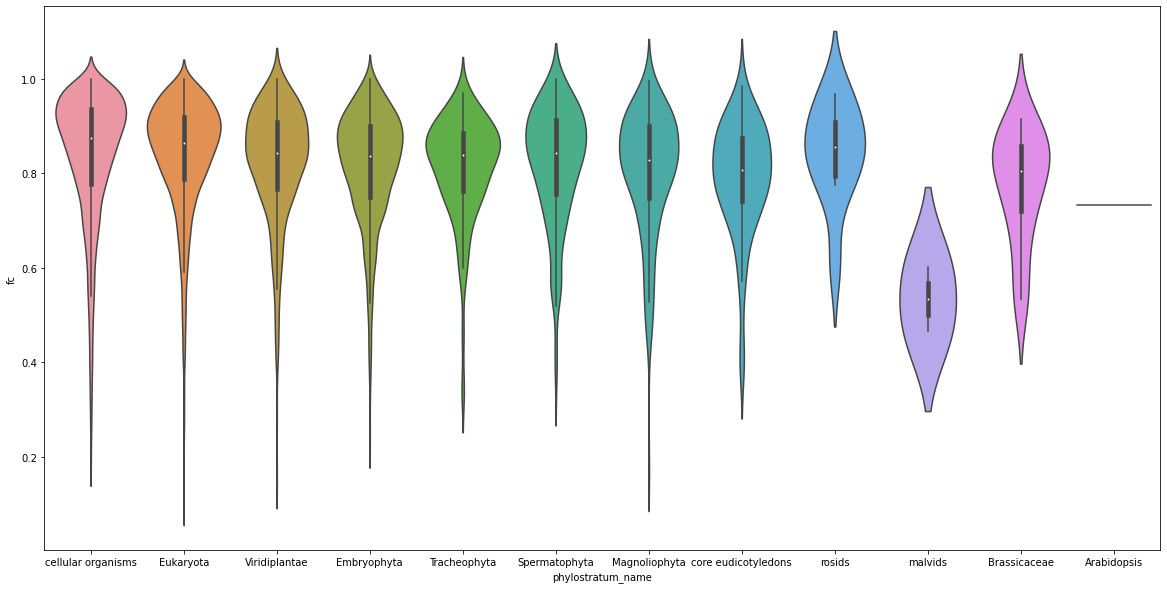

In [9]:
plt.figure(num =None, figsize = (20,10))
ax = sns.violinplot(x='phylostratum_name', y = 'fc' , data = mustard_arabidopsis_prio_NM, order = phylo_order)

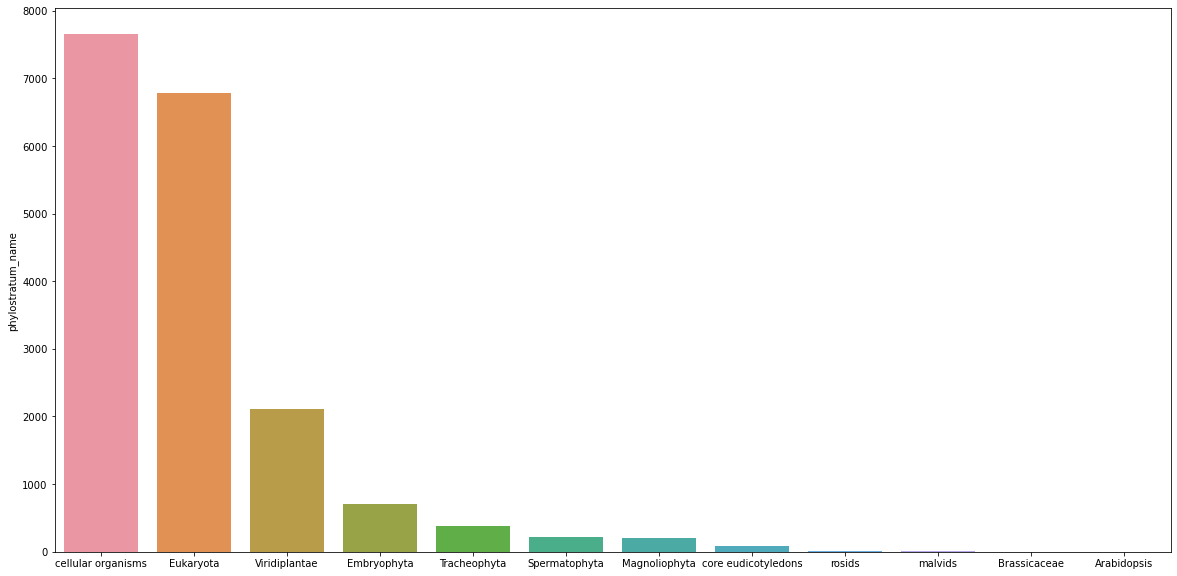

In [10]:
plt.figure(num =None, figsize = (20,10))
ax = sns.barplot(x = phylo_order, y = mustard_arabidopsis_prio_NM['phylostratum_name'].value_counts(), )

In [11]:
filled_na_map = mustard_arabidopsis_prio_NM['phylostratum_name'].fillna(value = 'none',inplace = True)
mustard_arabidopsis_prio_NM['phylostratum_name'].value_counts()

cellular organisms     7652
Eukaryota              6785
none                   5332
Embryophyta            2109
Viridiplantae           709
Spermatophyta           386
Magnoliophyta           225
Tracheophyta            201
core eudicotyledons      85
Brassicaceae             15
rosids                   10
malvids                   2
Arabidopsis               1
Name: phylostratum_name, dtype: int64

In [12]:
phylo_order = ['cellular organisms','Eukaryota','Viridiplantae','Embryophyta','Tracheophyta','Spermatophyta','Magnoliophyta','core eudicotyledons','rosids','malvids','Brassicaceae','Arabidopsis','none']

Text(0.5, 0, 'Phylostratum Level')

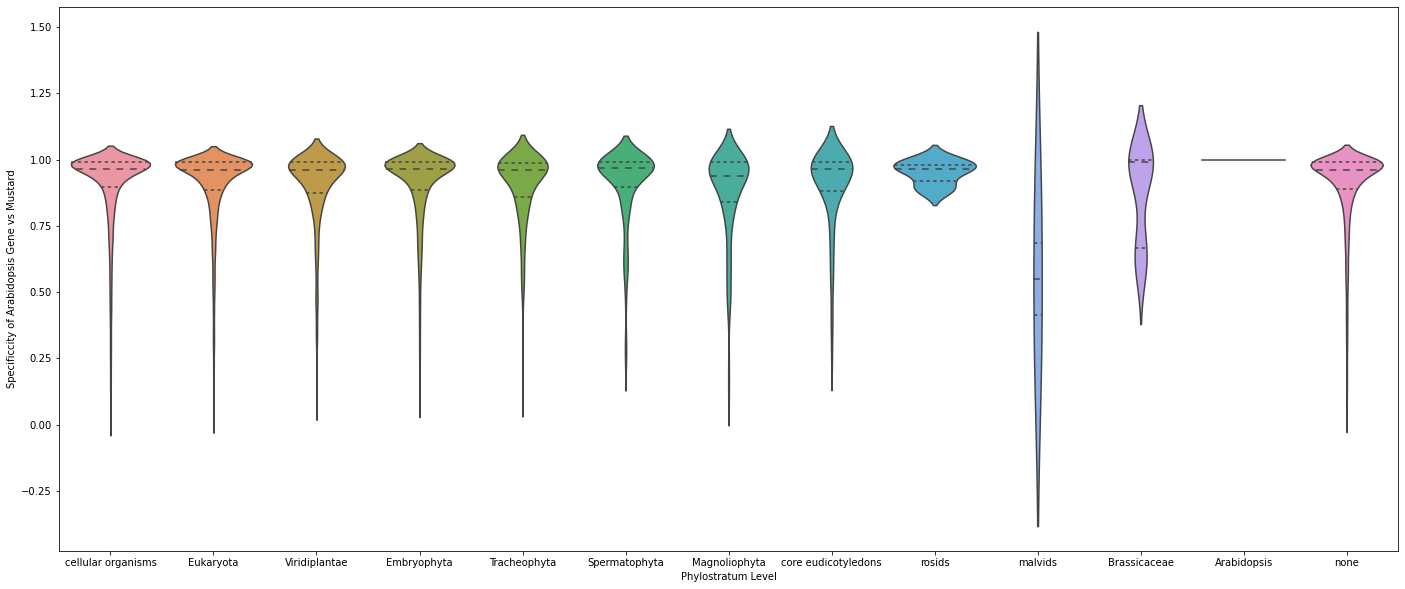

In [13]:
plt.figure(num =None, figsize = (24,10))
ax = sns.violinplot(x='phylostratum_name', y = 'sc' , data = mustard_arabidopsis_prio_NM, order = phylo_order,inner = 'quartile')
plt.ylabel(ylabel = 'Specificcity of Arabidopsis Gene vs Mustard')
plt.xlabel('Phylostratum Level')

Text(0.5, 0, 'Phylostratum')

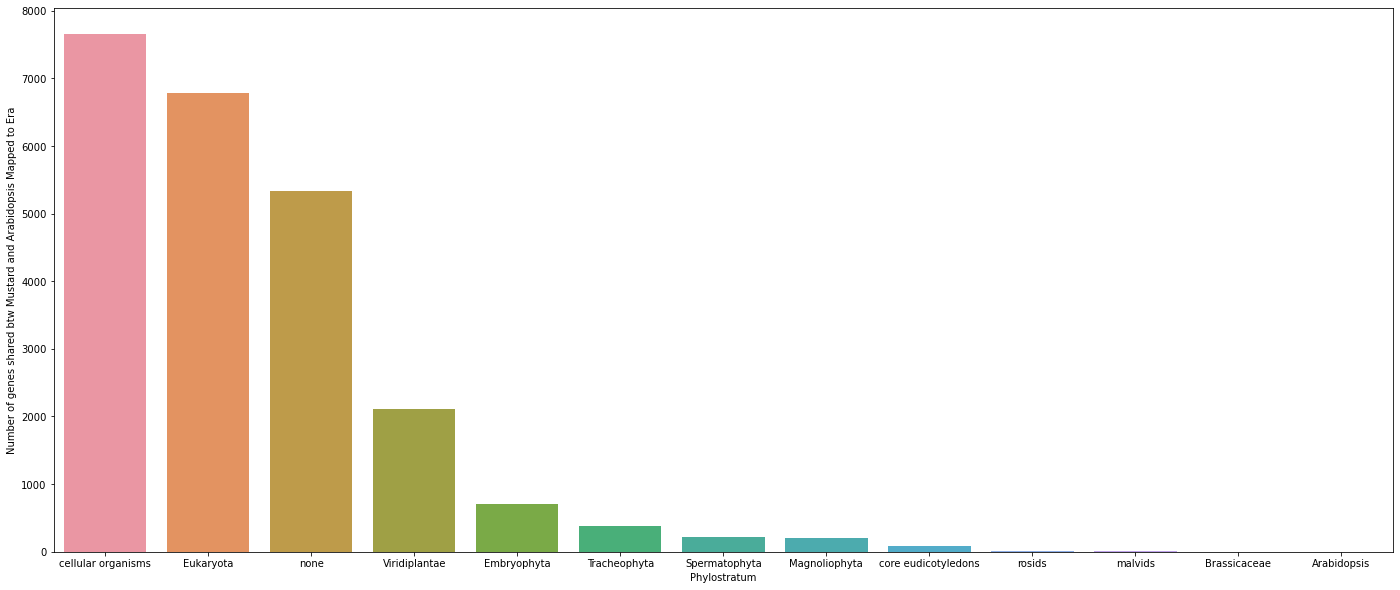

In [14]:
new_order = ['cellular organisms','Eukaryota','none','Viridiplantae','Embryophyta','Tracheophyta','Spermatophyta','Magnoliophyta','core eudicotyledons','rosids','malvids','Brassicaceae','Arabidopsis']
plt.figure(num =None, figsize = (24,10))
ax = sns.barplot(x = new_order, y = mustard_arabidopsis_prio_NM['phylostratum_name'].value_counts(), )
plt.ylabel('Number of genes shared btw Mustard and Arabidopsis Mapped to Era')
plt.xlabel('Phylostratum')

Text(0.5, 0, 'Phylostratum')

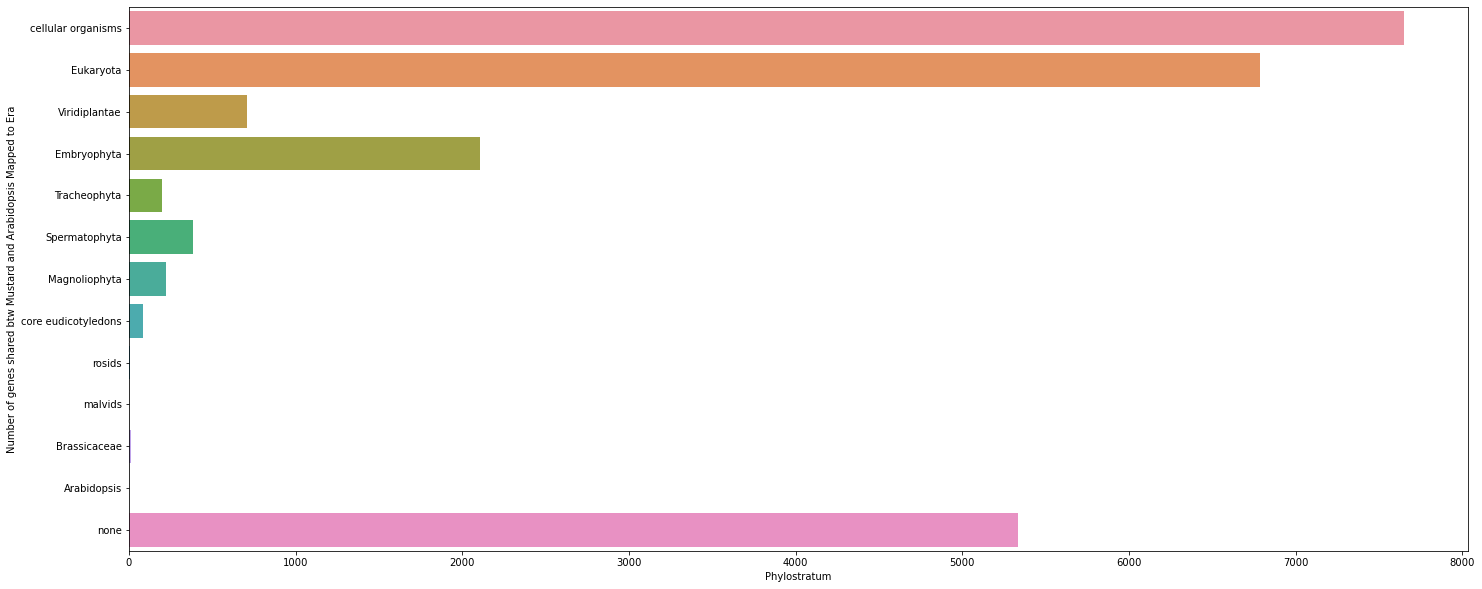

In [15]:
plt.figure(num =None, figsize = (24,10))
ax = sns.countplot(order = phylo_order, y = mustard_arabidopsis_prio_NM['phylostratum_name'], orient = 'h')
plt.ylabel('Number of genes shared btw Mustard and Arabidopsis Mapped to Era')
plt.xlabel('Phylostratum')


In [16]:
duplicated_gene_list = pd.read_csv('/home/passala/Gene_duplication_project/Generated_tables/no_drops_gene_list.csv')
duplicated_gene_list.drop(columns =['Coexpression','Unnamed: 0'],inplace= True)
duplicated_gene_list.dropna(axis =0,inplace = True, thresh = 4 )
duplicated_gene_list

,NCBI_name,NCBI_paired,Event,Mustard_gene,Mustard_gene_2
0,AT1G01010,AT4G01550,Alpha,LOC103836814,NaN
11,AT1G01350,AT4G01020,Alpha,NaN,LOC103844643
20,AT1G01540,AT4G01330,Alpha,LOC103836893,NaN
21,AT1G01550,AT4G01360,Alpha,LOC103840514,LOC103844659
22,AT1G01560,AT4G01370,Alpha,LOC103858851,NaN
...,...,...,...,...,...
5783,AT2G46340,AT4G11110,Gamma,LOC103833904,NaN
5784,AT2G46350,AT4G11110,Gamma,LOC103833904,NaN
5785,AT2G46400,AT4G23810,Gamma,LOC103861423,WRKY46
5786,AT2G46400,AT4G11070,Gamma,NaN,WRKY46


In [17]:
flattened_list_of_duplication_combinations = []
for index, gene_names in duplicated_gene_list.iterrows():
    if gene_names.isnull().values.any():
        if gene_names.isnull()[3]:
            comb_ncbi1_mustard2 = [gene_names[0],gene_names[4]]
            comb_ncbi2_mustard2 = [gene_names[1],gene_names[4]]
            flattened_list_of_duplication_combinations.append(comb_ncbi1_mustard2)
            flattened_list_of_duplication_combinations.append(comb_ncbi2_mustard2)
        if gene_names.isnull()[4]: 
            comb_ncbi1_mustard1 = [gene_names[0],gene_names[3]]
            comb_ncbi2_mustard1 = [gene_names[1],gene_names[3]]
            flattened_list_of_duplication_combinations.append(comb_ncbi1_mustard1)
            flattened_list_of_duplication_combinations.append(comb_ncbi2_mustard1)
    else:
        comb_ncbi1_mustard1 = [gene_names[0],gene_names[3]]
        comb_ncbi1_mustard2 = [gene_names[0],gene_names[4]]
        comb_ncbi2_mustard1 = [gene_names[1],gene_names[3]]
        comb_ncbi2_mustard2 = [gene_names[1],gene_names[4]] 
        flattened_list_of_duplication_combinations.append(comb_ncbi1_mustard1)
        flattened_list_of_duplication_combinations.append(comb_ncbi1_mustard2)
        flattened_list_of_duplication_combinations.append(comb_ncbi2_mustard1)
        flattened_list_of_duplication_combinations.append(comb_ncbi2_mustard2)


In [18]:
flat_list_pd = pd.DataFrame(flattened_list_of_duplication_combinations, columns = ['Arabidopsis Gene','Mustard Gene'])
flat_list_pd.drop_duplicates(inplace = True,ignore_index = True)
flat_list_pd

,Arabidopsis Gene,Mustard Gene
0,AT1G01010,LOC103836814
1,AT4G01550,LOC103836814
2,AT1G01350,LOC103844643
3,AT4G01020,LOC103844643
4,AT1G01540,LOC103836893
...,...,...
4242,AT2G46400,LOC103861423
4243,AT2G46400,WRKY46
4244,AT4G23810,WRKY46
4245,AT4G11070,WRKY46


In [19]:
non_indexed_mustard_prio = pd.read_csv('/home/passala/Gene_duplication_project/Networks/N_M_files/mustard_arabidopsis_prio_NM.csv')
non_indexed_mustard_prio

,sp1_gene,sp2_gene,fc,sc
0,LOC103852375,AT1G67120,0.965179,0.999250
1,LOC103858085,AT2G43680,0.668932,0.633379
2,LOC103866735,AT2G43680,0.912437,0.947414
3,LOC103841819,AT2G43680,0.684796,0.777245
4,LOC103858085,AT3G59690,0.710170,0.859114
...,...,...,...,...
23507,LOC103859264,AT3G11130,0.896136,0.870682
23508,LOC103870372,AT3G11130,0.927633,0.905440
23509,LOC103847080,AT3G08530,0.938386,0.892958
23510,LOC103859264,AT3G08530,0.907521,0.878701


In [20]:
for index, genes in flat_list_pd.iterrows():
    primary_gene = genes['Arabidopsis Gene']
    secondary_gene = genes['Mustard Gene']
    try:
        flat_list_pd.loc[index,'FC_Score'] = non_indexed_mustard_prio['fc'].loc[(non_indexed_mustard_prio['sp2_gene'] == primary_gene) & (non_indexed_mustard_prio['sp1_gene'] == secondary_gene)].to_list()
    except:
        flat_list_pd.loc[index,'FC_Score'] = None

In [21]:
# for index, values in duplicated_gene_list.iterrows():
#     if values.isnull().values.any():
#     else:
#         duplicated_gene_listloc[index,'NCBI1_Mustard_1'] = mustard_arabidopsis_prio_NM.loc[values[0],'fc']
#         duplicated_gene_listloc[index,'NCBI1_Mustard_2'] = mustard_arabidopsis_prio_NM.loc[values[1],'fc']

In [22]:
non_indexed_mustard_prio['fc'].loc[(non_indexed_mustard_prio['sp2_gene'] == 'AT3G08530') & (non_indexed_mustard_prio['sp1_gene'] == 'LOC103847080')].to_list()

[0.938385558367256]

In [23]:
flat_list_pd


,Arabidopsis Gene,Mustard Gene,FC_Score
0,AT1G01010,LOC103836814,NaN
1,AT4G01550,LOC103836814,0.750331
2,AT1G01350,LOC103844643,0.915237
3,AT4G01020,LOC103844643,NaN
4,AT1G01540,LOC103836893,NaN
...,...,...,...
4242,AT2G46400,LOC103861423,NaN
4243,AT2G46400,WRKY46,0.440985
4244,AT4G23810,WRKY46,NaN
4245,AT4G11070,WRKY46,NaN


In [24]:
dropped_flat_list = flat_list_pd.dropna() 
dropped_flat_list

,Arabidopsis Gene,Mustard Gene,FC_Score
1,AT4G01550,LOC103836814,0.750331
2,AT1G01350,LOC103844643,0.915237
5,AT4G01330,LOC103836893,0.880237
7,AT1G01550,LOC103844659,0.925411
8,AT4G01360,LOC103840514,0.942078
...,...,...,...
4227,AT4G11280,LOC103833884,0.988948
4232,AT3G61610,LOC103830313,0.522094
4233,AT4G23730,LOC103861392,0.652997
4240,AT4G11110,LOC103833904,0.901519


Text(0.5, 0, 'FC Score of Mustard - Arabdidopsis Gene Duplication Event Genes')

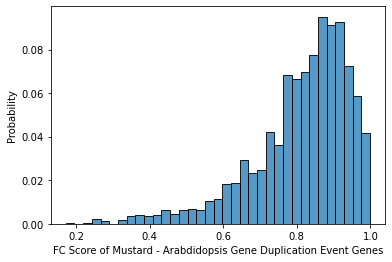

In [25]:
sns.histplot(data = dropped_flat_list, x = 'FC_Score',stat = 'probability')
plt.xlabel('FC Score of Mustard - Arabdidopsis Gene Duplication Event Genes')

<AxesSubplot:xlabel='fc', ylabel='Probability'>

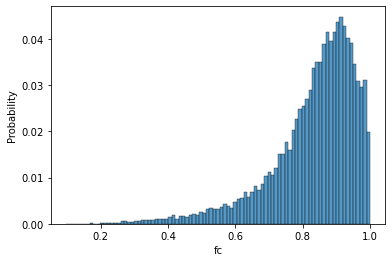

In [26]:
sns.histplot(data = non_indexed_mustard_prio, x = 'fc',stat = 'probability')

In [27]:
ortho_groups_to_genes = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/odb10v1_OG2genes.tab',sep = '\t',names = ['Group ID','Gene ID'])

In [28]:
ortho_groups_to_taxa = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/odb10v1_OGs.tab', sep = '\t',names = ['Group ID','taxa_ID','Group Name'])

In [29]:
type(ortho_groups_to_taxa['taxa_ID'][1])
eudicot_value = 71240 

In [30]:
ortho_groups_built_on_eudicot = ortho_groups_to_taxa.loc[ortho_groups_to_taxa['taxa_ID'] == eudicot_value ]
ortho_list_eudicot = ortho_groups_built_on_eudicot['Group ID']
ortho_genes_in_eudicot_groups = ortho_groups_to_genes.loc[ortho_groups_to_genes['Group ID'].isin(ortho_list_eudicot.to_list())]


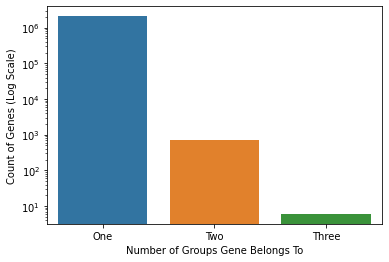

<Figure size 1440x1440 with 0 Axes>

In [31]:
g = sns.barplot(y=ortho_genes_in_eudicot_groups['Gene ID'].value_counts().value_counts().to_list(),x = ['One','Two','Three'])
g.set_xlabel('Number of Groups Gene Belongs To')
plt.figure(figsize=[20,20])
g.set_ylabel('Count of Genes (Log Scale)')
g.set_yscale('log')

In [32]:
ortho_genes_in_eudicot_groups.drop_duplicates(subset ='Gene ID',inplace=True)
ortho_genes_in_eudicot_groups['Species ID'] = ortho_genes_in_eudicot_groups['Gene ID'].str.partition('_')[0]
ortho_genes_in_eudicot_groups

/tmp/ipykernel_2241292/3448360395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ortho_genes_in_eudicot_groups.drop_duplicates(subset ='Gene ID',inplace=True)
/tmp/ipykernel_2241292/3448360395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ortho_genes_in_eudicot_groups['Species ID'] = ortho_genes_in_eudicot_groups['Gene ID'].str.partition('_')[0]


,Group ID,Gene ID,Species ID
19282,100004at71240,101020_0:00021e,101020
19283,100004at71240,101020_0:001250,101020
19284,100004at71240,130453_0:0081fd,130453
19285,100004at71240,130453_0:00832c,130453
19286,100004at71240,158383_0:001507,158383
...,...,...,...
195683203,99991at71240,90675_0:01357b,90675
195683204,99991at71240,93759_0:001d01,93759
195683205,99991at71240,93759_0:003453,93759
195683206,99991at71240,981085_0:000e90,981085


In [33]:
ortho_genes_to_species = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/odb10v1_genes.tab', sep = '\t',names = ['Gene ID','species_ID','Protein seq','synonyms','Uniprot','Ensembl','NCBI','Description'])
indexed_ortho_genes = ortho_genes_to_species.set_index('Gene ID')

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [34]:
ortho_genes_to_species

,Gene ID,species_ID,Protein seq,synonyms,Uniprot,Ensembl,NCBI,Description
0,1000373_1:000000,1000373_1,YP_005097973.1,RnQV1s4_gp1,NaN,NaN,11604942.0,structural protein
1,1000373_1:000001,1000373_1,RdRP_4@614:1065@YP_005097975.1,RdRP_4@614:1065@YP_005097975.1,NaN,NaN,NaN,"RNA-directed RNA polymerase, luteovirus"
2,1000562_0:000000,1000562_0,WP_037594048.1,WP_037594048.1,NaN,NaN,NaN,competence protein ComX
3,1000562_0:000001,1000562_0,WP_037594052.1,WP_037594052.1,NaN,NaN,NaN,tRNA pseudouridine synthase A
4,1000562_0:000002,1000562_0,WP_037594055.1,WP_037594055.1,NaN,NaN,NaN,hydroxymethylpyrimidine/phosphomethylpyrimidin...
...,...,...,...,...,...,...,...,...
40614189,999898_0:001238,999898_0,WP_047831901.1,yfmO_2,A0A0J1F6U3,CEB3_c51140,NaN,Multidrug efflux protein YfmO
40614190,999898_0:001239,999898_0,WP_047831902.1,CEB3_RS24900,A0A0J1I2X1,CEB3_c51160,NaN,A0A0J1I2X1_9FIRM
40614191,999898_0:00123a,999898_0,WP_053060993.1,CEB3_RS24905,NaN,NaN,NaN,hypothetical protein
40614192,999898_0:00123b,999898_0,WP_047831904.1,queD,A0A0J1F7K1,CEB3_c51180,NaN,"6-carboxy-5,6,7,8-tetrahydropterin synthase"


In [35]:
list_of_coco_plants = ['Oryza sativa','Brachypodium distachyon','Sorghum bicolor','Zea mays','Vitis vinifera','Arabidopsis thaliana','Brassica rapa','Brassica napus','Cucumis           sativus','Glycine max','Medicago truncatula','Arachis hypogaea','Malus domestica','Nicotiana tabacum','Solanum tuberosum','Solanum lycopersicum']


In [36]:
coconet_plants = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/tax_report.txt', sep = '\t')
coconet_plants.drop(['code','|','|.1','|.2','preferred name'],axis = 1,inplace=True)



In [37]:
ortho_genes_in_cocoplants = ortho_genes_in_eudicot_groups.loc[ortho_genes_in_eudicot_groups['Species ID'].isin(list(map(str,coconet_plants['taxid'].to_list())))]
ortho_genes_in_cocoplants

,Group ID,Gene ID,Species ID
19314,100004at71240,29760_0:000a7f,29760
19341,100004at71240,3702_0:002244,3702
19342,100004at71240,3711_0:0096e0,3711
19344,100004at71240,3750_0:000894,3750
19345,100004at71240,3750_0:00624e,3750
...,...,...,...
195683137,99991at71240,4097_0:0061df,4097
195683138,99991at71240,4097_0:0071a2,4097
195683139,99991at71240,4097_0:0080b8,4097
195683144,99991at71240,4113_0:00232e,4113


In [38]:
coconet_plants_indexed = coconet_plants.set_index('taxid')
coconet_plants_indexed

,name
taxid,
4530,Oryza sativa
15368,Brachypodium distachyon
4558,Sorghum bicolor
4577,Zea mays
29760,Vitis vinifera
3702,Arabidopsis thaliana
3711,Brassica rapa
3708,Brassica napus
3659,Cucumis sativus


In [39]:
# for index, pair in tqdm(ortho_genes_in_cocoplants.iterrows()):
#     plant_gene = pair[1]
#     plant_species =pair[2]
#     ortho_genes_in_cocoplants.loc[index,'Common Name'] = coconet_plants_indexed.loc[int(plant_species),'name']
#     ortho_genes_in_cocoplants.loc[index,'Uniprot'] = indexed_ortho_genes.loc[plant_gene,'Uniprot']
#     ortho_genes_in_cocoplants.loc[index,'NCBI'] = indexed_ortho_genes.loc[plant_gene,'NCBI']
    
# ortho_genes_in_cocoplants

In [40]:
ortho_genes_in_cocoplants.merge(right =ortho_genes_to_species[['Gene ID','Uniprot','Ensembl','NCBI']], on = 'Gene ID',how = 'left')

,Group ID,Gene ID,Species ID,Uniprot,Ensembl,NCBI
0,100004at71240,29760_0:000a7f,29760,D7TPN8,VIT_03s0063g01030,100262316.0
1,100004at71240,3702_0:002244,3702,Q9C566,AT2G15790,816074.0
2,100004at71240,3711_0:0096e0,3711,NaN,NaN,103844346.0
3,100004at71240,3750_0:000894,3750,NaN,NaN,103403510.0
4,100004at71240,3750_0:00624e,3750,NaN,NaN,103401343.0
...,...,...,...,...,...,...
310772,99991at71240,4097_0:0061df,4097,A0A1S3XF93,NaN,107764483.0
310773,99991at71240,4097_0:0071a2,4097,A0A1S3XXQ3,NaN,107769991.0
310774,99991at71240,4097_0:0080b8,4097,A0A1S3YDN7,NaN,107775170.0
310775,99991at71240,4113_0:00232e,4113,M1C1T7,PGSC0003DMG400022474,102597851.0


In [41]:
# ortho_genes_in_cocoplants.to_csv('/home/passala/Gene_duplication_project/Generated_tables/Eudicot_mapped_gene_groups.csv')

In [42]:
ortho_genes_in_cocoplants = pd.read_csv('/home/passala/Gene_duplication_project/Generated_tables/Eudicot_mapped_gene_groups.csv')
ortho_genes_in_cocoplants

,Unnamed: 0,Group ID,Gene ID,Species ID,Uniprot,Common Name,NCBI
0,19314,100004at71240,29760_0:000a7f,29760,D7TPN8,Vitis vinifera,100262316.0
1,19341,100004at71240,3702_0:002244,3702,Q9C566,Arabidopsis thaliana,816074.0
2,19342,100004at71240,3711_0:0096e0,3711,NaN,Brassica rapa,103844346.0
3,19344,100004at71240,3750_0:000894,3750,NaN,Malus domestica,103403510.0
4,19345,100004at71240,3750_0:00624e,3750,NaN,Malus domestica,103401343.0
...,...,...,...,...,...,...,...
310772,195683137,99991at71240,4097_0:0061df,4097,A0A1S3XF93,Nicotiana tabacum,107764483.0
310773,195683138,99991at71240,4097_0:0071a2,4097,A0A1S3XXQ3,Nicotiana tabacum,107769991.0
310774,195683139,99991at71240,4097_0:0080b8,4097,A0A1S3YDN7,Nicotiana tabacum,107775170.0
310775,195683144,99991at71240,4113_0:00232e,4113,M1C1T7,Solanum tuberosum,102597851.0


Text(0, 0.5, 'Number of Genes in OrthoDB Eudicot Groups')

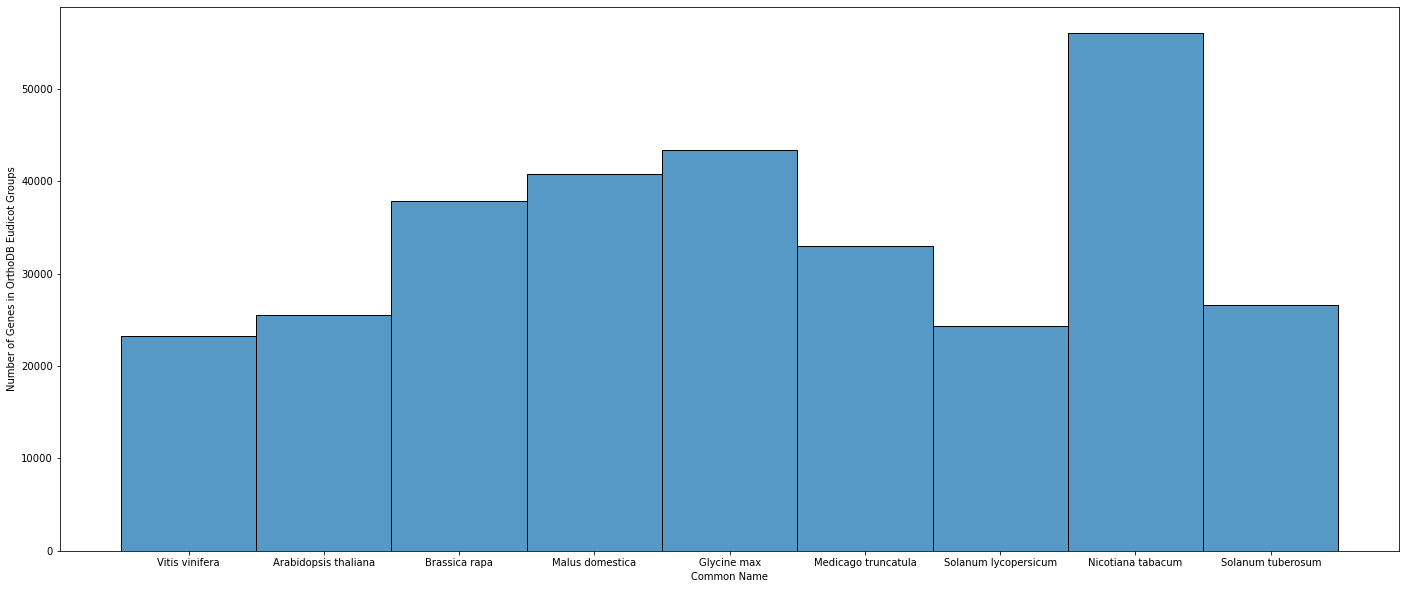

In [43]:
plt.figure(num =None, figsize = (24,10))
sns.histplot(data =ortho_genes_in_cocoplants, x = 'Common Name')
plt.ylabel('Number of Genes in OrthoDB Eudicot Groups')


In [44]:
list_of_groups_in_ortho = ortho_genes_in_cocoplants['Common Name'].drop_duplicates().to_list()

In [45]:
list_of_combinations = itertools.combinations(list_of_groups_in_ortho,2)
actual_list_of_combinations = list(list_of_combinations)

Text(0.5, 0, 'Number of Species in Group')

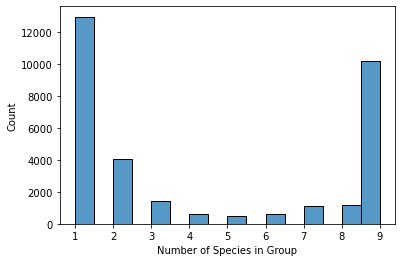

In [46]:
subset_of_groups_to_genes = ortho_genes_in_cocoplants.drop_duplicates(subset = ['Group ID','Common Name'])
sns.histplot(data = subset_of_groups_to_genes['Group ID'].value_counts())  ## Turn this into histogram of number of species/group
plt.xlabel('Number of Species in Group')

In [47]:
subset_of_groups_to_genes['Group ID'].value_counts()

2828at71240      9
80207at71240     9
73237at71240     9
77637at71240     9
125884at71240    9
                ..
214201at71240    1
101042at71240    1
200363at71240    1
232097at71240    1
222012at71240    1
Name: Group ID, Length: 32691, dtype: int64

In [48]:
one_species_pair =  subset_of_groups_to_genes.loc[subset_of_groups_to_genes['Common Name'].isin(actual_list_of_combinations[0])]
per_species_group = one_species_pair.drop_duplicates(subset = ['Group ID','Common Name'])
per_species_group_both_species_there = per_species_group.loc[per_species_group.duplicated(subset = 'Group ID')]
per_species_group_both_species_there ### Convert this to loop, chart how many combinations for each gene set

,Unnamed: 0,Group ID,Gene ID,Species ID,Uniprot,Common Name,NCBI
1,19341,100004at71240,3702_0:002244,3702,Q9C566,Arabidopsis thaliana,816074.0
28,68426,100069at71240,3702_0:003e0c,3702,F4JBW0,Arabidopsis thaliana,825230.0
39,81946,100085at71240,3702_0:006698,3702,Q9FIK2,Arabidopsis thaliana,834830.0
52,85266,100089at71240,3702_0:003f20,3702,Q9M169,Arabidopsis thaliana,823716.0
72,105163,100116at71240,3702_0:002b01,3702,Q29Q26,Arabidopsis thaliana,816246.0
...,...,...,...,...,...,...,...
310666,195607073,99915at71240,3702_0:002894,3702,A0A178VU69,Arabidopsis thaliana,818978.0
310688,195648831,99944at71240,3702_0:004cd6,3702,A0A178URX5,Arabidopsis thaliana,829006.0
310712,195668943,99975at71240,3702_0:002b7b,3702,A0A178VSH0,Arabidopsis thaliana,818546.0
310724,195674043,99980at71240,3702_0:00060f,3702,A0A178W9E1,Arabidopsis thaliana,838037.0


In [49]:
list_of_numb_groups = []
for comb_of_species in actual_list_of_combinations:
    current_list_of_groups_with_current_spec = subset_of_groups_to_genes.loc[subset_of_groups_to_genes['Common Name'].isin(comb_of_species)]
    current_list_of_groups_one_species_per_group = current_list_of_groups_with_current_spec.drop_duplicates(subset = ['Group ID','Common Name']) 
    current_list_of_groups_with_both_there = current_list_of_groups_one_species_per_group.loc[current_list_of_groups_one_species_per_group.duplicated(subset = 'Group ID')]
    current_number_of_groups_with_both_species = len(current_list_of_groups_with_both_there)
    list_of_numb_groups.append(current_number_of_groups_with_both_species)




<AxesSubplot:xlabel='Species Combination', ylabel='Number of Groups with both Species'>

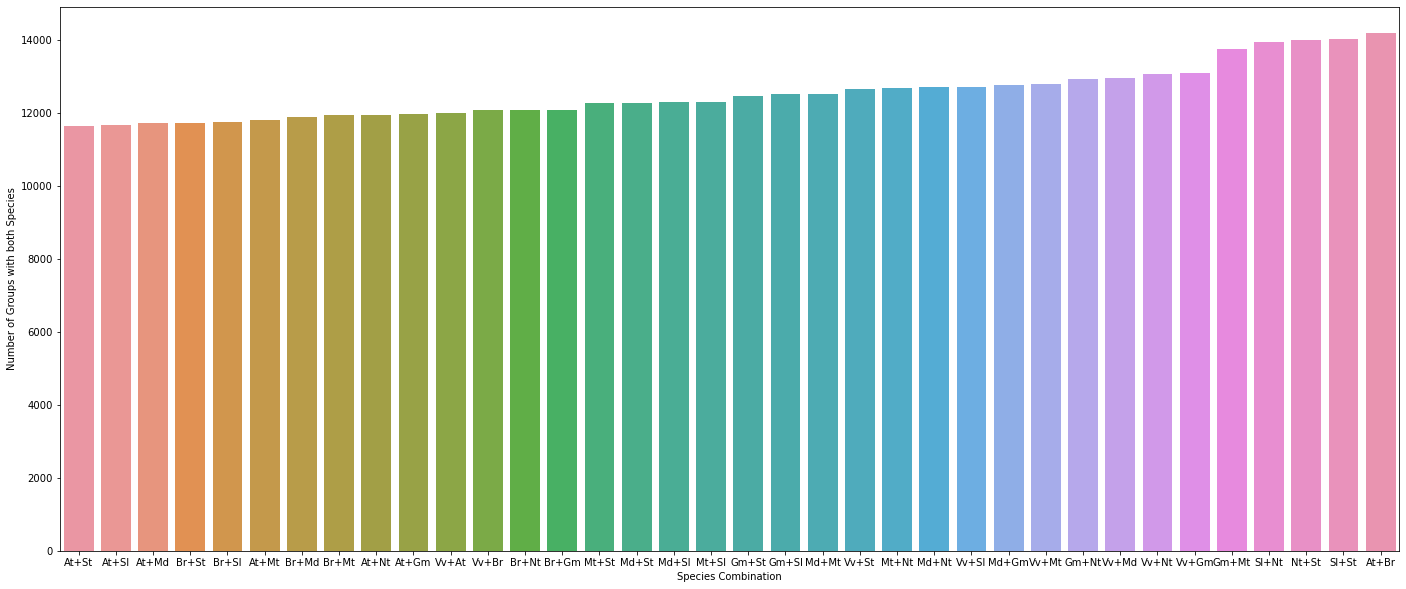

In [50]:
plt.figure(num =None, figsize = (24,10))
pd_of_combinations_and_counts = pd.DataFrame(data = actual_list_of_combinations,columns = ['Species 1','Species 2'])
pd_of_combinations_and_counts['Number of Groups with both Species'] = list_of_numb_groups

pd_of_combinations_and_counts['Species Combination'] = pd_of_combinations_and_counts['Species 1'].astype(str).str.split().str[0].str[0]+pd_of_combinations_and_counts['Species 1'].astype(str).str.split().str[1].str[0] + '+' +pd_of_combinations_and_counts['Species 2'].astype(str).str.split().str[0].str[0]+pd_of_combinations_and_counts['Species 2'].astype(str).str.split().str[1].str[0]


sns.barplot(data = pd_of_combinations_and_counts.sort_values('Number of Groups with both Species'),y = 'Number of Groups with both Species',x= 'Species Combination')

In [51]:
pd_of_combinations_and_counts['Test'] = pd_of_combinations_and_counts['Species 1'].astype(str).str.split().str[0].str[0]+pd_of_combinations_and_counts['Species 1'].astype(str).str.split().str[1].str[0] + '+' +pd_of_combinations_and_counts['Species 2'].astype(str).str.split().str[0].str[0]+pd_of_combinations_and_counts['Species 2'].astype(str).str.split().str[1].str[0]

In [52]:
pd_of_combinations_and_counts['Unique ID'] = pd_of_combinations_and_counts['Species 1'] + '+' + pd_of_combinations_and_counts ['Species 2']

In [53]:
pd_of_combinations_and_counts

,Species 1,Species 2,Number of Groups with both Species,Species Combination,Test,Unique ID
0,Vitis vinifera,Arabidopsis thaliana,12013,Vv+At,Vv+At,Vitis vinifera+Arabidopsis thaliana
1,Vitis vinifera,Brassica rapa,12077,Vv+Br,Vv+Br,Vitis vinifera+Brassica rapa
2,Vitis vinifera,Malus domestica,12967,Vv+Md,Vv+Md,Vitis vinifera+Malus domestica
3,Vitis vinifera,Glycine max,13087,Vv+Gm,Vv+Gm,Vitis vinifera+Glycine max
4,Vitis vinifera,Medicago truncatula,12794,Vv+Mt,Vv+Mt,Vitis vinifera+Medicago truncatula
5,Vitis vinifera,Solanum lycopersicum,12704,Vv+Sl,Vv+Sl,Vitis vinifera+Solanum lycopersicum
6,Vitis vinifera,Nicotiana tabacum,13078,Vv+Nt,Vv+Nt,Vitis vinifera+Nicotiana tabacum
7,Vitis vinifera,Solanum tuberosum,12662,Vv+St,Vv+St,Vitis vinifera+Solanum tuberosum
8,Arabidopsis thaliana,Brassica rapa,14190,At+Br,At+Br,Arabidopsis thaliana+Brassica rapa
9,Arabidopsis thaliana,Malus domestica,11734,At+Md,At+Md,Arabidopsis thaliana+Malus domestica


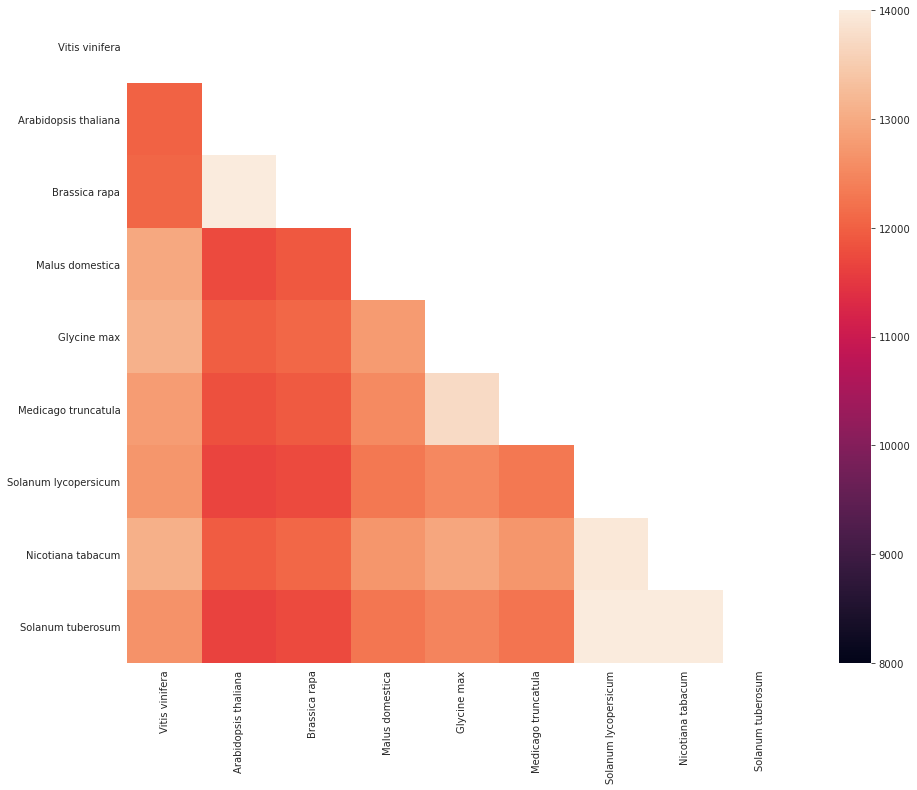

In [54]:
list_of_groups_in_ortho #### From here, make matrix with this as columns then go through it filling it out? 
matrix_of_group = pd.DataFrame(data = None, index = list_of_groups_in_ortho,columns = list_of_groups_in_ortho)
for index, species in pd_of_combinations_and_counts.iterrows():
    species_index = species['Species 1']
    species_column = species['Species 2']
    matrix_of_group.loc[species_index,species_column] = pd_of_combinations_and_counts['Number of Groups with both Species'].loc[(pd_of_combinations_and_counts['Species 1'] ==          species_index) & (pd_of_combinations_and_counts['Species 2'] == species_column)].to_list()[0]
matrix_of_group = matrix_of_group.transpose()
matrix_of_group = matrix_of_group.apply(pd.to_numeric)
with sns.axes_style('white'):
        f, ax = plt.subplots(figsize = (15,12))
        ax = sns.heatmap(matrix_of_group, vmin = 8000, vmax = 14000)

In [55]:
distance_matrix = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/distance_matrix.csv')
linkage_map_pd = distance_matrix.melt(id_vars = ['Unnamed: 0']).dropna()
linkage_dictionary = {}
for index, species_pair in linkage_map_pd.iterrows():
    linkage_dictionary[species_pair[0],species_pair[1]] = species_pair[2]
keys = [sorted(k) for k in linkage_dictionary.keys()]
values = linkage_dictionary.values()
sorted_keys,distances = zip(*sorted(zip(keys,values)))


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [45.0, 45.0, 70.0, 70.0],
  [35.0, 35.0, 57.5, 57.5],
  [12.5, 12.5, 46.25, 46.25]],
 'dcoord': [[0.0, 7.67, 7.67, 0.0],
  [0.0, 29.8, 29.8, 7.67],
  [0.0, 25.6, 25.6, 0.0],
  [0.0, 53.0, 53.0, 0.0],
  [25.6, 106.0, 106.0, 53.0],
  [0.0, 106.0, 106.0, 106.0],
  [0.0, 110.0, 110.0, 106.0],
  [29.8, 117.0, 117.0, 110.0]],
 'ivl': ['Nicotiana tabacum',
  'Solanum lycopersicum',
  'Solanum tuberosum',
  'Vitis vinifera',
  'Malus domestica',
  'Arabidopsis thaliana',
  'Brassica rapa',
  'Glycine max',
  'Medicago truncatula'],
 'leaves': [5, 6, 7, 8, 3, 0, 1, 2, 4],
 'color_list': ['C1', 'C1', 'C2', 'C3', 'C0', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C0', 'C0', 'C2', 'C2', 'C3', 'C3']}

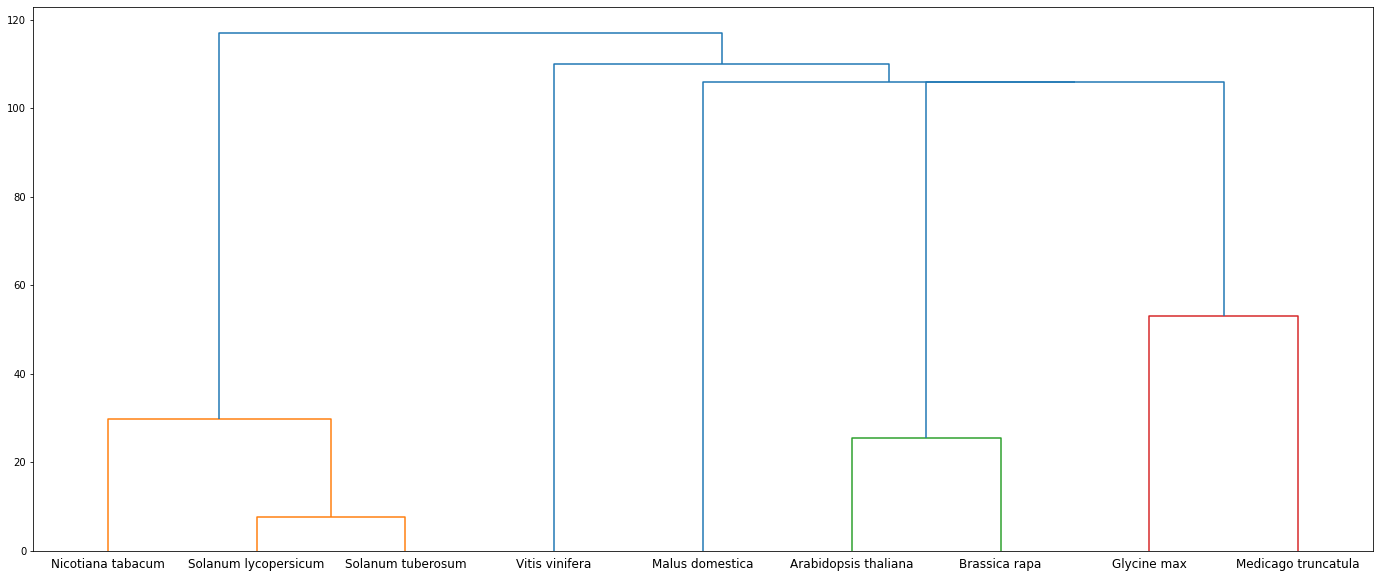

In [56]:
Z = scipy.cluster.hierarchy.linkage(distances)
labels = sorted(set([key[0] for key in sorted_keys] + [sorted_keys[-1][-1]]))
plt.figure(num =None, figsize = (24,10))
scipy.cluster.hierarchy.dendrogram(Z, labels = labels,)

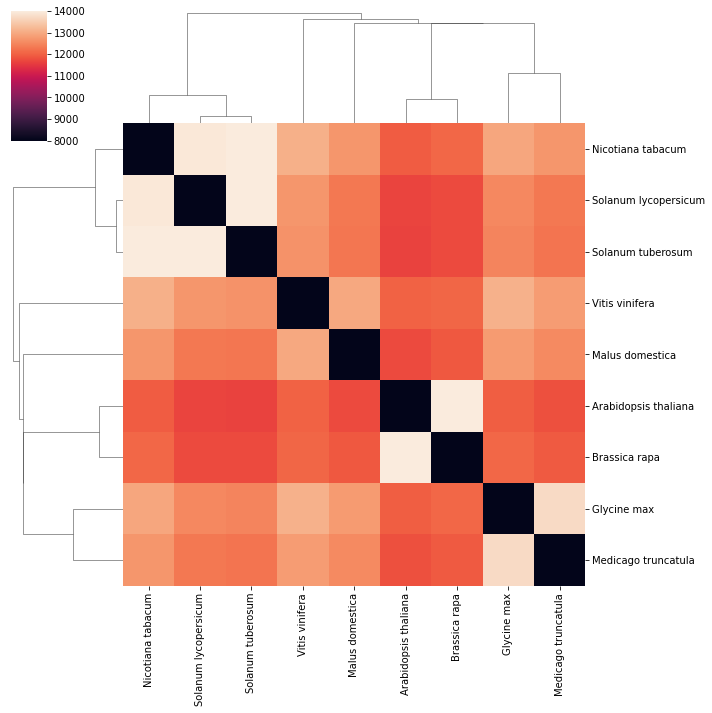

In [57]:
distance_matrix = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/distance_matrix.csv')
matrix_of_group.fillna(value = 0,inplace = True)
#matrix_test = matrix_of_group + matrix_of_group.T 
mat_copy = matrix_of_group + matrix_of_group.T
mat_copy.sort_index(inplace = True)
mat_cols = mat_copy.columns.tolist()
mat_cols.sort()
mat_copy = mat_copy[mat_cols]
sns.clustermap(data = mat_copy, row_linkage = Z, col_linkage = Z,vmin = 8000, vmax = 14000)

In [58]:
mask = np.zeros((len(mat_copy),len(mat_copy)),dtype = bool)
mask[np.triu_indices_from(mask)] =True 
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

In [59]:
np.triu_indices(9)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7,
        8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6,
        7, 8, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 5, 6, 7, 8, 6, 7, 8, 7, 8,
        8]))

In [60]:
matrix_of_group.index

Index(['Vitis vinifera', 'Arabidopsis thaliana', 'Brassica rapa',
       'Malus domestica', 'Glycine max', 'Medicago truncatula',
       'Solanum lycopersicum', 'Nicotiana tabacum', 'Solanum tuberosum'],
      dtype='object')

In [61]:
matrix_of_group_combos = pd_of_combinations_and_counts.pivot(index = 'Species 1',columns = 'Species 2',values = 'Number of Groups with both Species')
matrix_of_group_combos = matrix_of_group_combos.iloc[matrix_of_group_combos.isnull().sum(axis = 1).mul(1).argsort()]
matrix_of_group_combos

Species 2,Arabidopsis thaliana,Brassica rapa,Glycine max,Malus domestica,Medicago truncatula,Nicotiana tabacum,Solanum lycopersicum,Solanum tuberosum
Species 1,,,,,,,,
Vitis vinifera,12013.0,12077.0,13087.0,12967.0,12794.0,13078.0,12704.0,12662.0
Arabidopsis thaliana,NaN,14190.0,11973.0,11734.0,11820.0,11950.0,11660.0,11633.0
Brassica rapa,NaN,NaN,12082.0,11895.0,11936.0,12081.0,11744.0,11735.0
Malus domestica,NaN,NaN,12767.0,NaN,12531.0,12704.0,12291.0,12274.0
Glycine max,NaN,NaN,NaN,NaN,13741.0,12928.0,12515.0,12469.0
Medicago truncatula,NaN,NaN,NaN,NaN,NaN,12697.0,12296.0,12264.0
Solanum lycopersicum,NaN,NaN,NaN,NaN,NaN,13935.0,NaN,14029.0
Nicotiana tabacum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13987.0


In [62]:
def get_groups_and_return_genes_and_species(taxa_level):

    #Import packages
    import pandas as pd
    import numpy as np 
    im

    #Read in used files 
    ortho_groups_to_genes = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/odb10v1_OG2genes.tab',sep = '\t',names = 
        ['Group ID','Gene ID'])
    ortho_groups_to_taxa = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/odb10v1_OGs.tab', sep = '\t',names = 
        ['Group ID','taxa_ID','Group Name'])
    ortho_genes_to_species = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/odb10v1_genes.tab', sep = '\t',names = 
        ['Gene ID','species_ID','Protein seq','synonyms','Uniprot','Ensembl','NCBI','Description'])
    indexed_ortho_genes = ortho_genes_to_species.set_index('Gene ID')
    coconet_plants = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/tax_report.txt', sep = '\t')
    coconet_plants.drop(['code','|','|.1','|.2','preferred name'],axis = 1,inplace=True)

    # Get the groups 
    ortho_groups_built_on_taxa_lvl = ortho_groups_to_taxa.loc[ortho_groups_to_taxa['taxa_ID'] == taxa_level ]
    ortho_list_taxa_lvl = ortho_groups_built_on_taxa_lvl['Group ID']
    ortho_genes_in_taxa_groups = ortho_groups_to_genes.loc[ortho_groups_to_genes['Group ID'].isin(ortho_list_taxa_lvl.to_list())]

    #Drop Duplicates 
    ortho_genes_in_taxa_groups.drop_duplicates(subset ='Gene ID',inplace=True)
    #Clean Species ID
    ortho_genes_in_taxa_groups['Species ID'] = ortho_genes_in_taxa_groups['Gene ID'].str.partition('_')[0]

    #Drop Species not in CococoNet 
    ortho_genes_in_taxa_cocoplants = ortho_genes_in_taxa_groups.loc[ortho_genes_in_taxa_groups['Species ID'].isin(list(map(str,
        coconet_plants['taxid'].to_list())))]
    #Get Gene and Common Name mapping    
    ortho_genes_in_taxa_cocoplants.merge(right =ortho_genes_to_species[['Gene ID','Uniprot','Ensembl','NCBI']], on = 'Gene ID',how = 'left')   
    coconet_plants.columns =['Common Name', 'Species ID']
    coconet_typed = coconet_plants.astype({'Species ID':'str'})
    ortho_genes_in_taxa_cocoplants.merge(right = coconet_typed, on = 'Species ID',how = 'left' )  

    return ortho_genes_in_taxa_cocoplants


    



In [63]:
#temp_check = get_groups_and_return_genes_and_species(4447)

In [64]:
temp_check

NameError: name 'temp_check' is not defined

In [ ]:
# coconet_plants.columns =['Common Name', 'Species ID']
# coconet_typed = coconet_plants.astype({'Species ID':'str'})
# ortho_genes_in_taxa_cocoplants.merge(right = coconet_typed, on = 'Species ID',how = 'left' )

In [ ]:
# taxa_level = 4447
# # ortho_groups_to_genes = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/odb10v1_OG2genes.tab',sep = '\t',names = 
# #         ['Group ID','Gene ID'])
# # ortho_groups_to_taxa = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/odb10v1_OGs.tab', sep = '\t',names = 
# #         ['Group ID','taxa_ID','Group Name'])
# # ortho_genes_to_species = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/odb10v1_genes.tab', sep = '\t',names = 
# #         ['Gene ID','species_ID','Protein seq','synonyms','Uniprot','Ensembl','NCBI','Description'])
# indexed_ortho_genes = ortho_genes_to_species.set_index('Gene ID')
# coconet_plants = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/tax_report.txt', sep = '\t')
# coconet_plants.drop(['code','|','|.1','|.2','preferred name'],axis = 1,inplace=True)
# ortho_groups_built_on_taxa_lvl = ortho_groups_to_taxa.loc[ortho_groups_to_taxa['taxa_ID'] == taxa_level ]
# ortho_list_taxa_lvl = ortho_groups_built_on_taxa_lvl['Group ID']
# ortho_genes_in_taxa_groups = ortho_groups_to_genes.loc[ortho_groups_to_genes['Group ID'].isin(ortho_list_taxa_lvl.to_list())]

# #Drop Duplicates 
# ortho_genes_in_taxa_groups.drop_duplicates(subset ='Gene ID',inplace=True)
#     #Clean Species ID
# ortho_genes_in_taxa_groups['Species ID'] = ortho_genes_in_taxa_groups['Gene ID'].str.partition('_')[0]
# ortho_genes_in_taxa_cocoplants = ortho_genes_in_taxa_groups.loc[ortho_genes_in_taxa_groups['Species ID'].isin(list(map(str,
#         coconet_plants['taxid'].to_list())))]
# ortho_genes_in_taxa_cocoplants = ortho_genes_in_taxa_cocoplants.merge(right =ortho_genes_to_species[['Gene ID','Uniprot','Ensembl','NCBI']], on = 'Gene ID',how = 'left')
# coconet_plants.columns =['Common Name', 'Species ID']
# coconet_typed = coconet_plants.astype({'Species ID':'str'})
# ortho_genes_in_taxa_cocoplants.merge(right = coconet_typed, on = 'Species ID',how = 'left' )   

In [ ]:
# g = sns.barplot(y=temp_check['Gene ID'].value_counts().value_counts().to_list(),x = ['One','Two'])
# g.set_xlabel('Number of Groups Gene Belongs To')
# plt.figure(figsize=[20,20])
# g.set_ylabel('Count of Genes (Log Scale)')
# g.set_yscale('log')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [112.5, 112.5, 142.5, 142.5],
  [95.0, 95.0, 127.5, 127.5],
  [85.0, 85.0, 111.25, 111.25],
  [75.0, 75.0, 98.125, 98.125],
  [52.5, 52.5, 86.5625, 86.5625],
  [20.0, 20.0, 69.53125, 69.53125]],
 'dcoord': [[0.0, 12.19, 12.19, 0.0],
  [0.0, 50.0, 50.0, 0.0],
  [12.19, 50.0, 50.0, 50.0],
  [0.0, 7.67, 7.67, 0.0],
  [0.0, 29.8, 29.8, 7.67],
  [0.0, 2.02, 2.02, 0.0],
  [0.0, 25.6, 25.6, 2.02],
  [0.0, 53.0, 53.0, 0.0],
  [0.0, 55.6, 55.6, 53.0],
  [25.6, 106.0, 106.0, 55.6],
  [0.0, 106.0, 106.0, 106.0],
  [0.0, 106.0, 106.0, 106.0],
  [0.0, 110.0, 110.0, 106.0],
  [29.8, 117.0, 117.0, 110.0],
  [50.0, 160.0, 160.0, 117.0]],
 'ivl': ['Sorghum bicolor',
  'Zea mays',
  'Brachypodium distachyon',
  'Oryza sativa',
  '

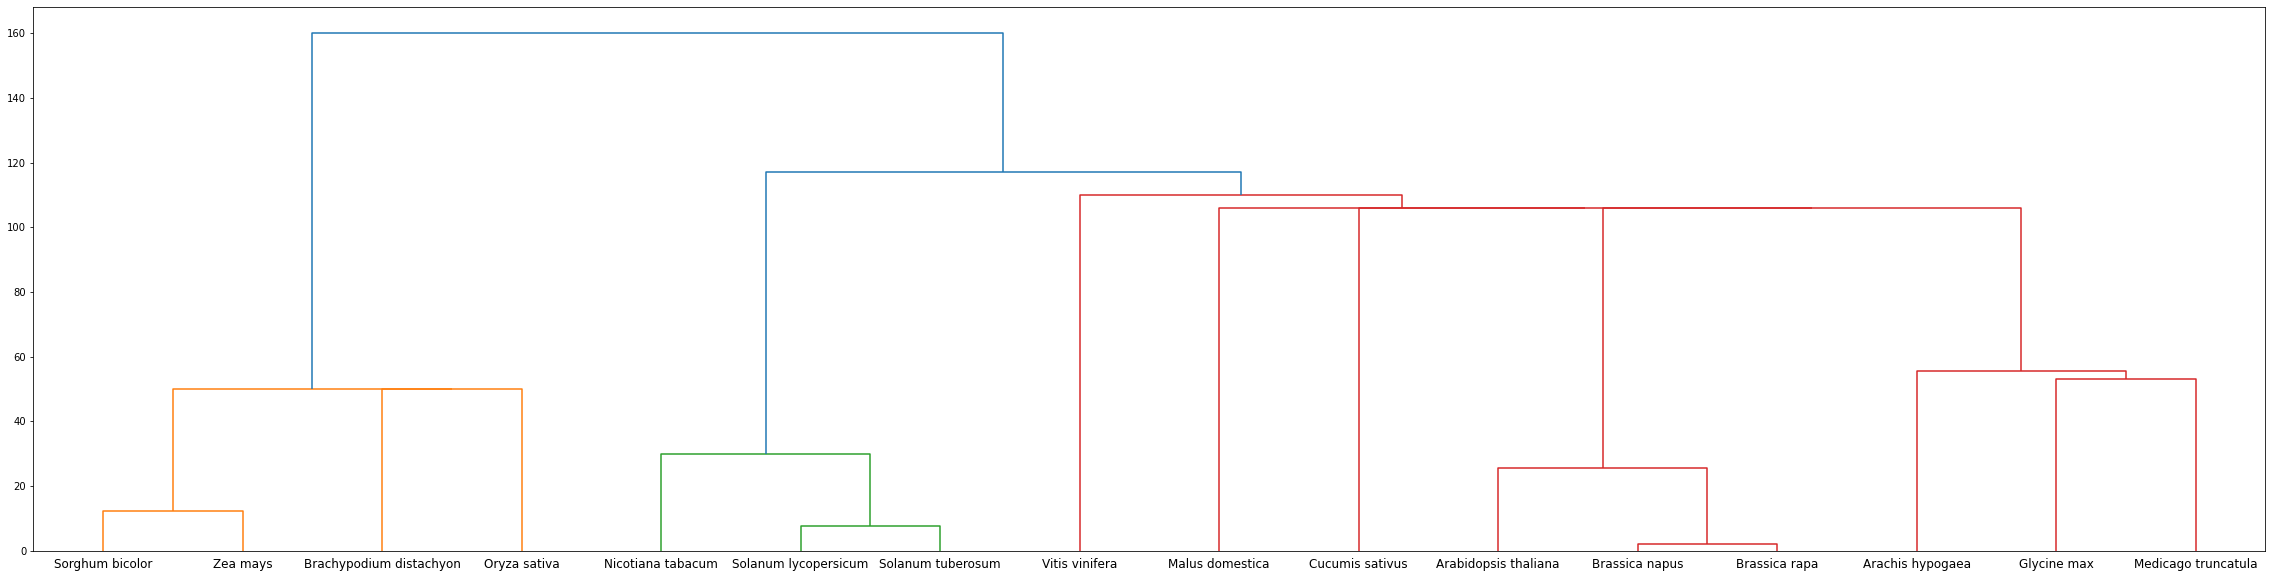

In [ ]:
distance_matrix_full = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/full_distance_matrix.csv')
linkage_map_pd_full = distance_matrix_full.melt(id_vars = ['Unnamed: 0']).dropna()
linkage_dictionary_full = {}
for index, species_pair in linkage_map_pd_full.iterrows():
    linkage_dictionary_full[species_pair[0],species_pair[1]] = species_pair[2]
keys_full = [sorted(k) for k in linkage_dictionary_full.keys()]
values_full = linkage_dictionary_full.values()
sorted_keys_full,distances_full = zip(*sorted(zip(keys_full,values_full)))
Z_full = scipy.cluster.hierarchy.linkage(distances_full)
labels_full = sorted(set([key[0] for key in sorted_keys_full] + [sorted_keys_full[-1][-1]]))
plt.figure(num =None, figsize = (40,10))
scipy.cluster.hierarchy.dendrogram(Z_full, labels = labels_full,)